# Dette Program bruge til at lave samme model som før nu med markedsværdier

## Det første step er til at hente data ind. Dette step er præcis det samme som i Program til seminar

In [555]:
# nedenstående kode er til at hente data og finde ud af hvor mange observationer der er pr. firma i dataen
# datasættet består af 25 observationer pr. firma der er 158 firmaer i alt

import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the Excel file
# hent data fra excel filen 'financielle_data_renset.xlsx'
data = pd.read_excel('financielle_data_renset.xlsx')

# sorter data efter firma kode og år med den ældste år først
data = data.sort_values(by=['firma kode', 'year'])

# i data filen 'data' laves en variable kaldt *growth* som er den procentvise vækst i 'Total Revenue' fra år til år 
data['Growth']= data['Total Revenue'].pct_change() * 100

# Group by 'firma kode' and calculate 3-year rolling average
data['risk average'] = data.groupby('firma kode')['EBITDA/Tot Assets, %'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Calculate deviation from the rolling average
data['risk'] = data['EBITDA/Tot Assets, %'] - data['risk average']

data.head()  # Display the first few rows of the DataFrame


### det her nede er en test af data
# Step 2: Count the number of observations per "firma kode"
#obs_per_firm = data['firma kode'].value_counts()

# Step 3: Print or save the result
#print(obs_per_firm)

# make a variable if the number of observations is not 25 
#obs_per_firm_wrong = obs_per_firm[obs_per_firm != 25]

#print(obs_per_firm_wrong)


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent","Long Term Debt to Total Capital, Percent",Net Debt To EBITDA (Daily Time Series Ratio),"Effective Tax Rate, (%)",Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk
24,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
23,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
22,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
21,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
20,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0


In [556]:
## merge with the dataset 'branche data.xlsx'

# load data 'branche data.xlsx'
branche_data = pd.read_excel('branche data.xlsx')

# merge the two datasets in a left join on the column 'firma kode' = 'firma kode' 
# with 'data' as a left join 'branche_data' as b on 'firma kode' = 'firma kode'
# from b take only variable 'Company Common Name' and 'NAICS Sector Name'               !!!!! hvis koden ikke virker så prøv at ændre 'firma kode' til 'Firma kode' i data og branche_data
data_merge = pd.merge(data, branche_data[['Firma kode', 'Company Common Name', 'NAICS Sector Name']], left_on='firma kode', right_on='Firma kode', how='left')
data_merge.head()  # Display the first few rows of the DataFrame


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name
0,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
1,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
2,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
3,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
4,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information


### Her skal der nu merges med Tobin's Q datasættet

In [557]:
## merge with the dataset 'branche data.xlsx'

# load data ' *** tobins q *** data.xlsx'
tobin_data = pd.read_excel('tobins Q.xlsx')

# sorter data efter firma kode og år med den ældste år først
tobin_data = tobin_data.sort_values(by=['firma kode', 'year'])

#tobin_data.head(5)

# merge the two datasets in a left join on the column 'firma kode' = 'firma kode' and 'year' = 'year'
# with 'data' as a left join 'tobin_data' as b on 'firma kode' = 'firma kode' and 'year' = 'year'
# from b take only variables 'Market Value for Company', 'Total Assets, Reported'  and 'Total Debt'  !!!!! hvis koden ikke virker så prøv at ændre 'firma kode' til 'Firma kode' i data og branche_data
data_merge_2 = pd.merge(data_merge, tobin_data[['firma kode', 'year', 'Market Value for Company', 'Total Assets, Reported', 
                                                'Total Debt','EBIT', 'EBITDA']], left_on=['firma kode', 'year'], 
                                                right_on=['firma kode', 'year'], how='left')

# gnerer Tobins Q = ('Market Value for Company' + 'Total Debt') / 'Total Assets, Reported'
#data_merge_2['Tobins Q'] = (data_merge_2['Market Value for Company']) / data_merge_2['Total Assets, Reported']

data_merge_2.head()  # Display the first few rows of the DataFrame


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name,Market Value for Company,"Total Assets, Reported",Total Debt,EBIT,EBITDA
0,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN
1,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN
2,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN
3,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN
4,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN


## Nu filterer vi på samme måde som før for null rækker og for finansielle virksomheder 

In [558]:
# data test 
# make a copi of data called data_test
data_test = data_merge_2.copy()

# define all columns
cols_to_check = [
    #"Total Debt to Total Equity, Percent",
    "Effective Tax Rate, (%)",
    "Quick Ratio",
    "EBITDA Margin, Percent",
    "Total Revenue",
    "Total Cash Dividends Paid, Cumulative"
    #"Market Value for Company", # tjek om det er det rigtige navn
    #"Total Debt", # tjek om det er det rigtige navn
    #"Total Assets, Reported" # tjek om det er det rigtige navn
]


# make the data_test sort out all obs if if alle variablerne er 0
data_test_1 = data_test[
    (data_test[cols_to_check] != 0).any(axis=1)  # Keep rows where at least one column is not zero
]


# Keep only rows where *all* three columns are present (not NaN)
cols = ["Market Value for Company", "Total Assets, Reported", "Total Debt", "EBIT", "EBITDA"]

data_test_2 = data_test_1.dropna(subset=cols)

# ‑‑ or, if you prefer an explicit boolean mask ‑‑
mask = data_test_1[cols].notna().all(axis=1)
data_test_2 = data_test_1[mask]

# drop rows if 'NAICS Sector Name' is == "Finance and Insurance"
data_test_3 = data_test_2[data_test_1['NAICS Sector Name'] != "Finance and Insurance"]

# drop rows if debt = 0
data_test_3 = data_test_3[data_test_3['Total Debt'] != 0]

# make a variable called 'debt to assets ratio' by dividing 'Total Debt to Total Equity, Percent' with 'Tot Assets/Comm Eqty'
data_test_3['debt to assets ratio'] = data_test_3['Total Debt to Total Equity, Percent'] / data_test_3['Tot Assets/Comm Eqty']
data_test_3['debt to assets ratio 2'] = (data_test_3['Total Debt'] / (data_test_3['Market Value for Company'] + data_test_3['Total Debt'] )) * 100


data_test_3.head()  # Display the first few rows of the DataFrame

C:\Users\marcu\AppData\Local\Temp\ipykernel_11124\305792881.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_3 = data_test_2[data_test_1['NAICS Sector Name'] != "Finance and Insurance"]


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,Firma kode,Company Common Name,NAICS Sector Name,Market Value for Company,"Total Assets, Reported",Total Debt,EBIT,EBITDA,debt to assets ratio,debt to assets ratio 2
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,5PG.OL,5Th Planet Games A/S,Information,8.744197e+07,63240000.0,6891000.0,-28031000.0,-16627000.0,10.896584,7.304975
16,5PG.OL,2016-12-31 00:00:00,31,12,2016,-126.747697,-175.930070,-34.585335,1.989655,33.911767,...,5PG.OL,5Th Planet Games A/S,Information,5.776310e+07,29811000.0,5081000.0,-28489000.0,-16091000.0,17.044044,8.085086
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,5PG.OL,5Th Planet Games A/S,Information,2.015621e+08,70188000.0,3148000.0,-26362000.0,-18840000.0,4.485097,1.537785
19,5PG.OL,2019-12-31 00:00:00,31,12,2019,-64.654729,-97.175108,-23.684731,1.902897,44.061962,...,5PG.OL,5Th Planet Games A/S,Information,1.500972e+07,13267000.0,3072000.0,-7809000.0,-5992000.0,23.155197,16.989533
20,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,5PG.OL,5Th Planet Games A/S,Information,8.925154e+07,27380000.0,2271000.0,-5580000.0,-5271000.0,8.294375,2.481356


hvis data sorteringen virker køre nedstående kode

In [559]:
data_test= data_test_3.copy()

## her laver vi den markedsværdi baseret variable

Her er formlerne for alle de markeds baseret variable 

$$ 
ROA_{bogført} = \frac{\text{Nettoresultat (EBIT eller EBITDA)}}{\text{Bogført aktiver}},  (\text{her kan den normale ROA bruges})
$$
$$ 
ROA_{markedsværdi} = \frac{\text{Nettoresultat (EBIT eller EBITDA)}}{\text{Markedsværdi af aktiver}}
$$
 

Markedsværdier af aktiver er givet ved $\text{Markedsværdi af egenkapital (Market value of company) + Bogført gæld}$

markedsværdi af egenkapital er givet som $\text{aktiekurs x antallet af aktier}$

$$ 
ROE_{bogført} = \frac{\text{Nettoresultat (EBIT eller EBITDA)}}{\text{Bogført egenkapital}},  (\text{her kan den normale ROE bruges})
$$
$$ 
ROE_{markedsværdi} = \frac{\text{Nettoresultat (EBIT eller EBITDA)}}{\text{Markedsværdi af egenkapital (Market value of company)}}
$$

Her er markedsværdi for gæld

$$
\text{gæld til samlet aktiver}_{bogført} = \frac{gæld (Total Debt)}{\text{samlet aktiver (Total assets)}} 
$$

$$
\text{gæld til samlet aktiver}_{markedsværdi} = \frac{gæld (Total Debt)}{\text{markedsværdi af aktiver (se ovenfor)}} 
$$

In [560]:
# here we make ROA_market_value = EBIT / (Market Value for Company + Total Debt)
data_test['ROA_market_value'] = (data_test['EBITDA'] / (data_test['Market Value for Company'] + data_test['Total Debt']))*100

# here we make ROE_market_value = EBIT / Market Value for Company
data_test['ROE_market_value'] = (data_test['EBITDA'] / (data_test['Market Value for Company']))*100

# here we make debt_book_value = Total Debt / (Total Assets, Reported)
data_test['debt_book_value'] = (data_test['Total Debt'] / (data_test['Total Assets, Reported']))*100

# here we make debt_market_value = Total Debt / (Market Value for Company + Total Debt)
data_test['debt_market_value'] = (data_test['Total Debt'] / (data_test['Market Value for Company'] + data_test['Total Debt']))*100

data_test.head()  # Display the first few rows of the DataFrame

,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,"Total Assets, Reported",Total Debt,EBIT,EBITDA,debt to assets ratio,debt to assets ratio 2,ROA_market_value,ROE_market_value,debt_book_value,debt_market_value
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,63240000.0,6891000.0,-28031000.0,-16627000.0,10.896584,7.304975,-17.625862,-19.014896,10.896584,7.304975
16,5PG.OL,2016-12-31 00:00:00,31,12,2016,-126.747697,-175.930070,-34.585335,1.989655,33.911767,...,29811000.0,5081000.0,-28489000.0,-16091000.0,17.044044,8.085086,-25.604629,-27.856882,17.044044,8.085086
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,70188000.0,3148000.0,-26362000.0,-18840000.0,4.485097,1.537785,-9.203260,-9.346996,4.485097,1.537785
19,5PG.OL,2019-12-31 00:00:00,31,12,2019,-64.654729,-97.175108,-23.684731,1.902897,44.061962,...,13267000.0,3072000.0,-7809000.0,-5992000.0,23.155197,16.989533,-33.138438,-39.920795,23.155197,16.989533
20,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,27380000.0,2271000.0,-5580000.0,-5271000.0,8.294375,2.481356,-5.759237,-5.905780,8.294375,2.481356


## Her filter vi igen på 1pct.

In [ ]:
# List of variables to trim ROE and ROA and debt 
trim_vars = ['ROA_market_value', 'ROE_market_value', 'debt_market_value', 'debt_book_value'] #'ROA Total Assets, Percent', 'ROE Total Equity %'

# Create a copy to work with
data_trimmed = data_test.copy()

for var in trim_vars:
    lower = data_trimmed[var].quantile(0.02)
    upper = data_trimmed[var].quantile(0.98)
    data_trimmed = data_trimmed[(data_trimmed[var] >= lower) & (data_trimmed[var] <= upper)]

data_trimmed = data_trimmed[(data_trimmed['ROE_market_value'] <= 58) & data_trimmed['ROA_market_value'] >= -20]

print(f"Rows kept: {len(data_trimmed)} out of {len(data_test)}")
data_trimmed.head()

Rows kept: 1505 out of 1781


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,"Total Assets, Reported",Total Debt,EBIT,EBITDA,debt to assets ratio,debt to assets ratio 2,ROA_market_value,ROE_market_value,debt_book_value,debt_market_value
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,63240000.0,6891000.0,-28031000.0,-16627000.0,10.896584,7.304975,-17.625862,-19.014896,10.896584,7.304975
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,70188000.0,3148000.0,-26362000.0,-18840000.0,4.485097,1.537785,-9.203260,-9.346996,4.485097,1.537785
20,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,27380000.0,2271000.0,-5580000.0,-5271000.0,8.294375,2.481356,-5.759237,-5.905780,8.294375,2.481356
25,AAB.CO,2000-12-31 00:00:00,31,12,2000,-4.548081,-5.709372,9.335682,1.271559,3.479967,...,104320000.0,2855000.0,-7699000.0,10017000.0,2.736771,6.506966,22.830221,24.419169,2.736771,6.506966
26,AAB.CO,2001-12-31 00:00:00,31,12,2001,0.155797,0.220915,9.338337,1.564768,19.507962,...,128034000.0,15962000.0,-4078000.0,10849000.0,12.467001,28.479309,19.356724,27.064509,12.467001,28.479309


In [602]:
#import numpy as np
#from scipy.stats import zscore     # part of SciPy
#import pandas as pd

# 1. Columns to screen
#trim_vars = ['ROA_market_value', 'ROE_market_value',
#             'debt_market_value', 'debt_book_value']

# 2. Copy the original frame
#data_trimmed = data_test.copy()

# 3. Compute Z-scores (column-wise, ignoring NaNs)
#z = np.abs(zscore(data_trimmed[trim_vars], nan_policy='omit'))

# 4. Build a mask: keep rows whose Z-score ≤ 3 in *all* vars
#threshold = 3.5
#mask = (z <= threshold).all(axis=1)

# 5. Apply the mask
#data_trimmed = data_trimmed[mask]

# (Optional) inspect result
#print(f"Rows kept: {len(data_trimmed)} out of {len(data_test)}")
#data_trimmed.head()


#### Plotter data 

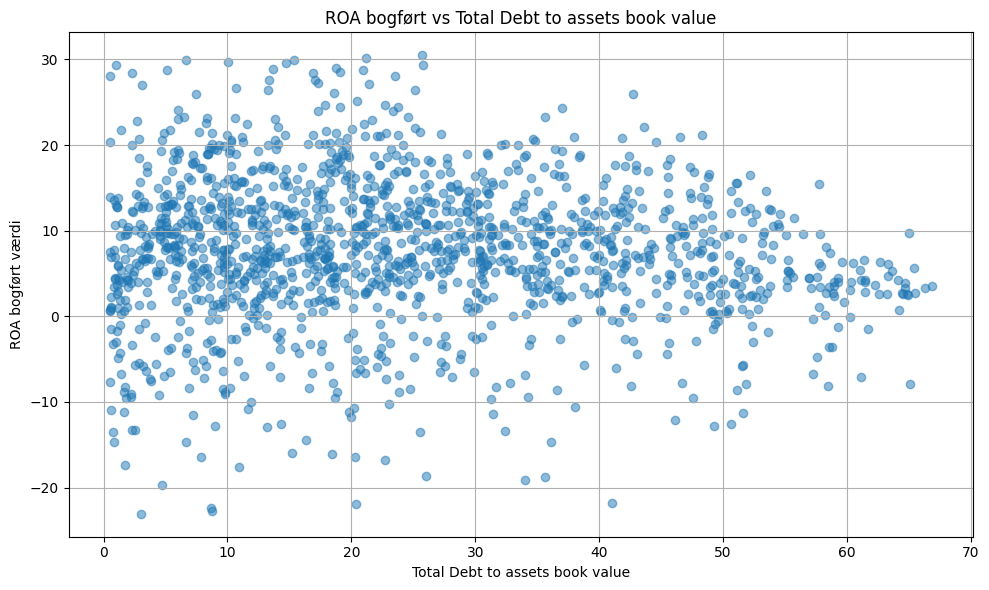

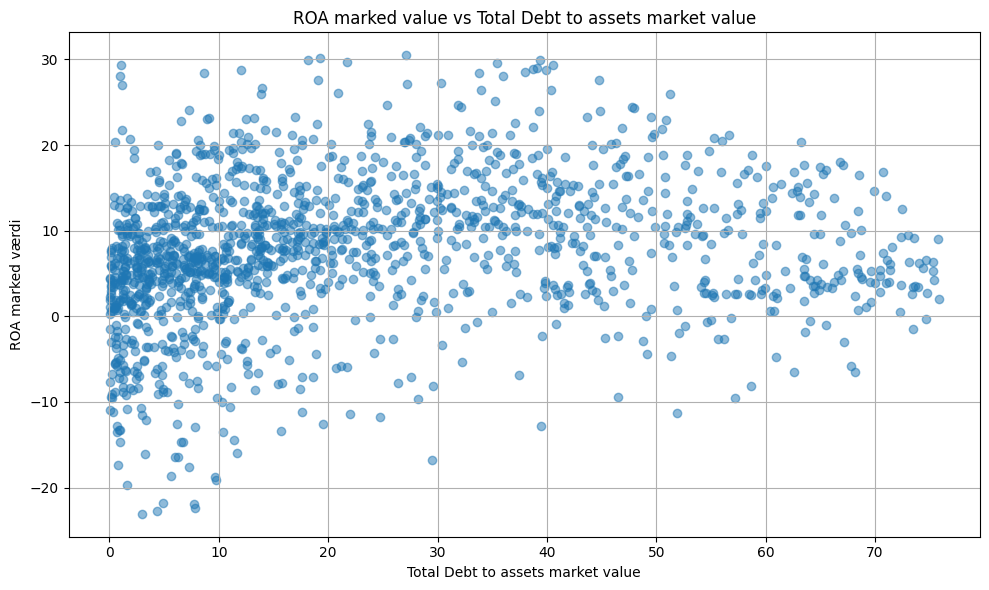

In [603]:
# Check the shape of the trimmed data
data_filter = data_test.copy()

# first plot 'Tobins Q' against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['debt_book_value'], data_trimmed['ROA_market_value'], alpha=0.5)  
plt.title('ROA bogført vs Total Debt to assets book value')
plt.xlabel('Total Debt to assets book value')  
plt.ylabel('ROA bogført værdi')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Tobins Q_vs_TDTE_filter.png', dpi=300)  # Save figure

plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['debt_market_value'], data_trimmed['ROA_market_value'], alpha=0.5)  
plt.title('ROA marked value vs Total Debt to assets market value')
plt.xlabel('Total Debt to assets market value')  
plt.ylabel('ROA marked værdi')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Tobins Q_vs_TDTE_trimmed.png', dpi=300)  # Save figure

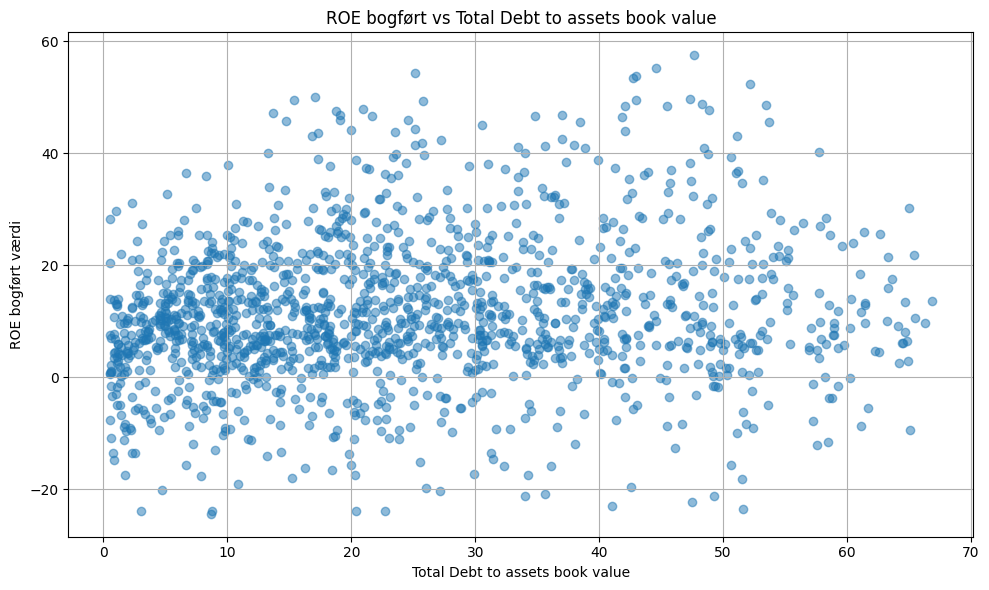

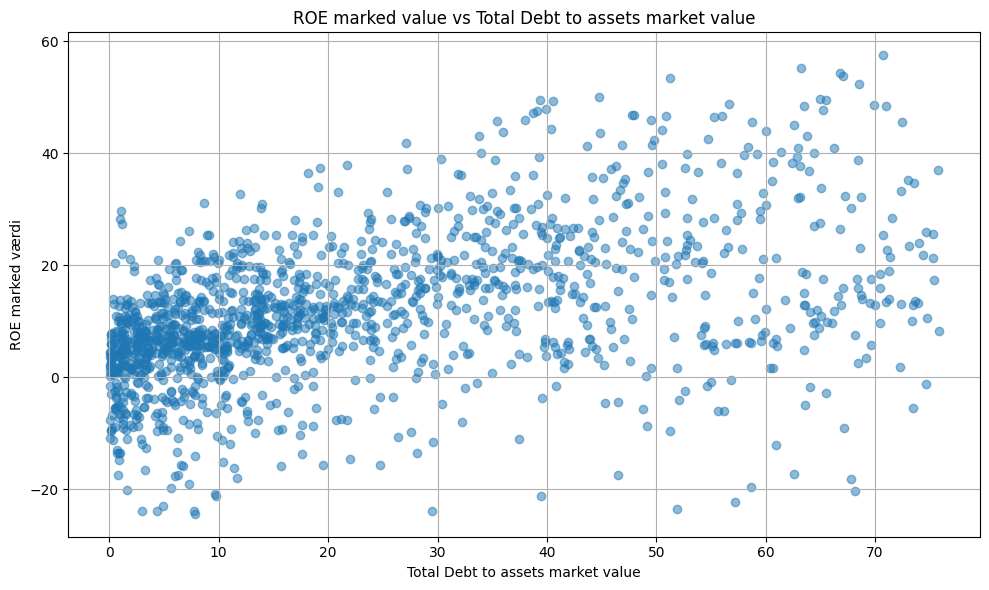

In [604]:
# Check the shape of the trimmed data
data_filter = data_test.copy()

# first plot 'Tobins Q' against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['debt_book_value'], data_trimmed['ROE_market_value'], alpha=0.5)  
plt.title('ROE bogført vs Total Debt to assets book value')
plt.xlabel('Total Debt to assets book value')  
plt.ylabel('ROE bogført værdi')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Tobins Q_vs_TDTE_filter.png', dpi=300)  # Save figure

plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['debt_market_value'], data_trimmed['ROE_market_value'], alpha=0.5)  
plt.title('ROE marked value vs Total Debt to assets market value')
plt.xlabel('Total Debt to assets market value')  
plt.ylabel('ROE marked værdi')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Tobins Q_vs_TDTE_trimmed.png', dpi=300)  # Save figure

## Her laver vi Pooled ols på ROE bogført og markedsværdi

#### Her der det først for ROE bogført med bogført gæld og markedsgæld

In [565]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROE Total Equity %']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_book_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:     ROE Total Equity %   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     5.754
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.88e-05
Time:                        15:14:45   Log-Likelihood:                -7590.2
No. Observations:                1463   AIC:                         1.519e+04
Df Residuals:                    1456   BIC:                         1.523e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [566]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROE Total Equity %']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_market_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:     ROE Total Equity %   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     6.229
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.00e-05
Time:                        15:14:45   Log-Likelihood:                -7590.2
No. Observations:                1463   AIC:                         1.519e+04
Df Residuals:                    1456   BIC:                         1.523e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


#### Her laver vi markedsværdi af ROE til gæld med hhv. bogført gæld og markedsbaseret gæld

In [567]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROE_market_value']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_book_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:       ROE_market_value   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     14.03
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.01e-13
Time:                        15:14:45   Log-Likelihood:                -5763.8
No. Observations:                1463   AIC:                         1.154e+04
Df Residuals:                    1456   BIC:                         1.158e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [568]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROE_market_value']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_market_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:       ROE_market_value   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     73.75
Date:                Thu, 08 May 2025   Prob (F-statistic):           5.73e-69
Time:                        15:14:45   Log-Likelihood:                -5586.8
No. Observations:                1463   AIC:                         1.119e+04
Df Residuals:                    1456   BIC:                         1.122e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


## Nu laver vi Pooled ols på ROA

#### her først for den bogførte ROA med gæld i hhv. bogført og markedsværdi

In [569]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA Total Assets, Percent']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_book_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                                OLS Regression Results                               
Dep. Variable:     ROA Total Assets, Percent   R-squared:                       0.210
Model:                                   OLS   Adj. R-squared:                  0.206
Method:                        Least Squares   F-statistic:                     10.01
Date:                       Thu, 08 May 2025   Prob (F-statistic):           1.96e-09
Time:                               15:14:45   Log-Likelihood:                -6044.3
No. Observations:                       1463   AIC:                         1.210e+04
Df Residuals:                           1456   BIC:                         1.214e+04
Df Model:                                  6                                         
Covariance Type:                         HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [570]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA Total Assets, Percent']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_market_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                                OLS Regression Results                               
Dep. Variable:     ROA Total Assets, Percent   R-squared:                       0.207
Model:                                   OLS   Adj. R-squared:                  0.204
Method:                        Least Squares   F-statistic:                     9.292
Date:                       Thu, 08 May 2025   Prob (F-statistic):           1.01e-08
Time:                               15:14:45   Log-Likelihood:                -6046.7
No. Observations:                       1463   AIC:                         1.211e+04
Df Residuals:                           1456   BIC:                         1.214e+04
Df Model:                                  6                                         
Covariance Type:                         HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


#### nu laves det med markedsværdi ROA på gæld hhv. bogført og markedsbaseret

In [571]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA_market_value']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_book_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:       ROA_market_value   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     12.41
Date:                Thu, 08 May 2025   Prob (F-statistic):           8.23e-12
Time:                        15:14:45   Log-Likelihood:                -5080.6
No. Observations:                1463   AIC:                         1.018e+04
Df Residuals:                    1456   BIC:                         1.021e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [572]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA_market_value']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_market_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:       ROA_market_value   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     23.63
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.69e-23
Time:                        15:14:45   Log-Likelihood:                -5059.9
No. Observations:                1463   AIC:                         1.013e+04
Df Residuals:                    1456   BIC:                         1.017e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


## Her laver vi FE på år og branche for markedsværdi ROE med gæld hhv. bogført og markedsværdi


her der det med market to book

In [573]:
# 1. Start fresh
data_fe_ROE_debt_bog = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_ROE_debt_bog['year'] = data_fe_ROE_debt_bog['year'].astype(str)
data_fe_ROE_debt_bog['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROE_bog = [
    'ROE_market_value',
    'debt_book_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_ROE_debt_bog = data_fe_ROE_debt_bog[model_vars_ROE_bog].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_FE_ROE_bog = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_book_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_ROE_debt_bog
).fit(cov_type='HC3')

print(model_FE_ROE_bog.summary())

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.240
Model:                               OLS   Adj. R-squared:                  0.218
Method:                    Least Squares   F-statistic:                     10.22
Date:                   Thu, 08 May 2025   Prob (F-statistic):           5.83e-55
Time:                           15:14:45   Log-Likelihood:                -5622.1
No. Observations:                   1463   AIC:                         1.133e+04
Df Residuals:                       1420   BIC:                         1.156e+04
Df Model:                             42                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

Her tester vi med en F-test om FE er at fortrække over en Pooled OLS

In [574]:
import statsmodels.formula.api as smf

# ------------------------------------------------------------------
# 1.  POOL (restricted) model –– same X-variables, no fixed effects
# ------------------------------------------------------------------
model_pooled_ROE_bog = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_book_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_fe_ROE_debt_bog
).fit(cov_type='HC3')                # keep the same robust SE type

# ------------------------------------------------------------------
# 2.  F-test:  H0  All year & branche dummies = 0
# ------------------------------------------------------------------
F_stat, p_val, df_denom = model_FE_ROE_bog.compare_f_test(model_pooled_ROE_bog)

print(f"\nJoint-significance F-test for fixed-effect dummies:")
print(f"  F({model_FE_ROE_bog.df_model - model_pooled_ROE_bog.df_model:.0f}, "
      f"{df_denom:.0f}) = {F_stat:.2f},   p-value = {p_val:.4g}")


Joint-significance F-test for fixed-effect dummies:
  F(36, 36) = 8.43,   p-value = 3.291e-39


c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:2273: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


FE er at fortrække

her er det market to market

In [575]:
# 1. Start fresh
data_fe_ROE_debt_market = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_ROE_debt_market['year'] = data_fe_ROE_debt_market['year'].astype(str)
data_fe_ROE_debt_market['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROE_market = [
    'ROE_market_value',
    'debt_market_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_ROE_debt_market = data_fe_ROE_debt_market[model_vars_ROE_market].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_FE_ROE_market = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_market_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_ROE_debt_market
).fit(cov_type='HC3')

print(model_FE_ROE_market.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.440
Model:                               OLS   Adj. R-squared:                  0.423
Method:                    Least Squares   F-statistic:                     23.64
Date:                   Thu, 08 May 2025   Prob (F-statistic):          8.37e-131
Time:                           15:14:46   Log-Likelihood:                -5399.6
No. Observations:                   1463   AIC:                         1.089e+04
Df Residuals:                       1420   BIC:                         1.111e+04
Df Model:                             42                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


Her tester vi med en F-test om FE er at fortrække over en Pooled OLS

In [576]:
import statsmodels.formula.api as smf

# ------------------------------------------------------------------
# 1.  POOL (restricted) model –– same X-variables, no fixed effects
# ------------------------------------------------------------------
model_pooled_ROE_market = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_market_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_fe_ROE_debt_market
).fit(cov_type='HC3')                # keep the same robust SE type

# ------------------------------------------------------------------
# 2.  F-test:  H0  All year & branche dummies = 0
# ------------------------------------------------------------------
F_stat, p_val, df_denom = model_FE_ROE_market.compare_f_test(model_pooled_ROE_market)

print(f"\nJoint-significance F-test for fixed-effect dummies:")
print(f"  F({model_FE_ROE_market.df_model - model_pooled_ROE_market.df_model:.0f}, "
      f"{df_denom:.0f}) = {F_stat:.2f},   p-value = {p_val:.4g}")


Joint-significance F-test for fixed-effect dummies:
  F(36, 36) = 11.51,   p-value = 1.38e-56


c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:2273: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


FE er at fortrække 

## her laver vi FE for markedsværdi ROA med gæld hhv. bogført og marked

In [577]:
# 1. Start fresh
data_fe_ROA_debt_bog = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_ROA_debt_bog['year'] = data_fe_ROA_debt_bog['year'].astype(str)
data_fe_ROA_debt_bog['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROA_bog = [
    'ROA_market_value',
    'debt_book_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_ROA_debt_bog = data_fe_ROA_debt_bog[model_vars_ROA_bog].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_FE_ROA_bog = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_book_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_ROA_debt_bog
).fit(cov_type='HC3')

print(model_FE_ROA_bog.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROA_market_value")   R-squared:                       0.246
Model:                               OLS   Adj. R-squared:                  0.224
Method:                    Least Squares   F-statistic:                     12.40
Date:                   Thu, 08 May 2025   Prob (F-statistic):           2.21e-68
Time:                           15:14:46   Log-Likelihood:                -4942.7
No. Observations:                   1463   AIC:                             9971.
Df Residuals:                       1420   BIC:                         1.020e+04
Df Model:                             42                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


Her tester vi med en F-test om FE er at fortrække over en Pooled OLS

In [578]:
import statsmodels.formula.api as smf

# ------------------------------------------------------------------
# 1.  POOL (restricted) model –– same X-variables, no fixed effects
# ------------------------------------------------------------------
model_pooled_ROA_bog = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_book_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_fe_ROA_debt_bog
).fit(cov_type='HC3')                # keep the same robust SE type

# ------------------------------------------------------------------
# 2.  F-test:  H0  All year & branche dummies = 0
# ------------------------------------------------------------------
F_stat, p_val, df_denom = model_FE_ROA_bog.compare_f_test(model_pooled_ROA_bog)

print(f"\nJoint-significance F-test for fixed-effect dummies:")
print(f"  F({model_FE_ROA_bog.df_model - model_pooled_ROA_bog.df_model:.0f}, "
      f"{df_denom:.0f}) = {F_stat:.2f},   p-value = {p_val:.4g}")

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:2273: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +



Joint-significance F-test for fixed-effect dummies:
  F(36, 36) = 8.18,   p-value = 8.639e-38


FE er at fortrække

Her med market to market

In [579]:
# 1. Start fresh
data_fe_ROA_debt_market = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_ROA_debt_market['year'] = data_fe_ROA_debt_market['year'].astype(str)
data_fe_ROA_debt_market['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROA_market = [
    'ROA_market_value',
    'debt_market_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_ROA_debt_market = data_fe_ROA_debt_market[model_vars_ROA_market].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_FE_ROA_market = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_market_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_ROA_debt_market
).fit(cov_type='HC3')

print(model_FE_ROA_market.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROA_market_value")   R-squared:                       0.301
Model:                               OLS   Adj. R-squared:                  0.281
Method:                    Least Squares   F-statistic:                     15.58
Date:                   Thu, 08 May 2025   Prob (F-statistic):           3.76e-87
Time:                           15:14:46   Log-Likelihood:                -4887.0
No. Observations:                   1463   AIC:                             9860.
Df Residuals:                       1420   BIC:                         1.009e+04
Df Model:                             42                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


Her tester vi med en F-test om FE er at fortrække over en Pooled OLS

In [580]:
import statsmodels.formula.api as smf

# ------------------------------------------------------------------
# 1.  POOL (restricted) model –– same X-variables, no fixed effects
# ------------------------------------------------------------------
model_pooled_ROA_market = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_market_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_fe_ROA_debt_market
).fit(cov_type='HC3')                # keep the same robust SE type

# ------------------------------------------------------------------
# 2.  F-test:  H0  All year & branche dummies = 0
# ------------------------------------------------------------------
F_stat, p_val, df_denom = model_FE_ROA_market.compare_f_test(model_pooled_ROA_market)

print(f"\nJoint-significance F-test for fixed-effect dummies:")
print(f"  F({model_FE_ROA_market.df_model - model_pooled_ROA_market.df_model:.0f}, "
      f"{df_denom:.0f}) = {F_stat:.2f},   p-value = {p_val:.4g}")


Joint-significance F-test for fixed-effect dummies:
  F(36, 36) = 10.52,   p-value = 4.715e-51


c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:2273: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


FE er at fortrække

## Vi vil nu tjekke for Random Effekt på markedsværdi af ROE med gæld hhv. bogført og markeds 

In [581]:
data_random = data_trimmed.copy()
data_random['branche'] = data_merge['NAICS Sector Name'].astype(str)
#data_random.head()

her er det market to book

In [582]:
%pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [583]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_random_ROE_bog = data_random.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_ROE_bog = [
    'ROE_market_value',
    'debt_book_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_random_ROE_bog = data_random_ROE_bog[model_vars_ROE_bog].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_ROE_bog = RandomEffects.from_formula(
    'Q("ROE_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROE_bog
)
re_results_ROE_bog = re_model_ROE_bog.fit(cov_type='robust')
print(re_results_ROE_bog.summary)


                          RandomEffects Estimation Summary                         
Dep. Variable:     Q('ROE_market_value')   R-squared:                        0.1325
Estimator:                 RandomEffects   R-squared (Between):              0.6116
No. Observations:                   1463   R-squared (Within):               0.0775
Date:                   Thu, May 08 2025   R-squared (Overall):              0.3695
Time:                           15:14:54   Log-likelihood                   -5727.8
Cov. Estimator:                   Robust                                           
                                           F-statistic:                      37.091
Entities:                             13   P-value                           0.0000
Avg Obs:                          112.54   Distribution:                  F(6,1457)
Min Obs:                          11.000                                           
Max Obs:                          706.00   F-statistic (robust):            

her laver vi en LM test for at se om RE er at fortrække over Pooled OLS

In [584]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare
from scipy import stats

# Estimate the pooled OLS model (no firm effects)
pooled_model_ROE_bog = PooledOLS.from_formula(
    'Q("ROE_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROE_bog
)
pooled_results_ROE_bog = pooled_model_ROE_bog.fit()

# LM test statistic for RE vs Pooled OLS
N = data_random_ROE_bog.index.get_level_values(0).nunique()  # Number of firms
T = data_random_ROE_bog.index.get_level_values(1).nunique()  # Number of time periods (or average if unbalanced)

# Residuals from pooled OLS
e = pooled_results_ROE_bog.resids
# Average residual by entity
e_bar_ROE_bog = e.groupby(level=0).mean()

# LM statistic
LM_ROE_bog = (T / (2 * N)) * ((e_bar_ROE_bog ** 2).sum() / (e.var()))
p_value_ROE_bog = 1 - stats.chi2.cdf(LM_ROE_bog, 1)

print(f"Breusch-Pagan LM statistic: {LM_ROE_bog:.4f}")
print(f"P-value: {p_value_ROE_bog:.4f}")


Breusch-Pagan LM statistic: 3.5257
P-value: 0.0604


Her er det market to market

In [585]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_random_ROE_market = data_random.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_ROE_market = [
    'ROE_market_value',
    'debt_market_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_random_ROE_market = data_random_ROE_market[model_vars_ROE_market].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_ROE_market = RandomEffects.from_formula(
    'Q("ROE_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROE_market
)
re_results_ROE_market = re_model_ROE_market.fit(cov_type='robust')
print(re_results_ROE_market.summary)


                          RandomEffects Estimation Summary                         
Dep. Variable:     Q('ROE_market_value')   R-squared:                        0.3889
Estimator:                 RandomEffects   R-squared (Between):              0.8112
No. Observations:                   1463   R-squared (Within):               0.3537
Date:                   Thu, May 08 2025   R-squared (Overall):              0.5767
Time:                           15:14:54   Log-likelihood                   -5450.9
Cov. Estimator:                   Robust                                           
                                           F-statistic:                      154.52
Entities:                             13   P-value                           0.0000
Avg Obs:                          112.54   Distribution:                  F(6,1457)
Min Obs:                          11.000                                           
Max Obs:                          706.00   F-statistic (robust):            

Her laver i LM test for at se om RE er at fortrække over Pooled OLS

In [586]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare
from scipy import stats

# Estimate the pooled OLS model (no firm effects)
pooled_model_ROE_market = PooledOLS.from_formula(
    'Q("ROE_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROE_market
)
pooled_results_ROE_market = pooled_model_ROE_market.fit()

# LM test statistic for RE vs Pooled OLS
N = data_random_ROE_market.index.get_level_values(0).nunique()  # Number of firms
T = data_random_ROE_market.index.get_level_values(1).nunique()  # Number of time periods (or average if unbalanced)

# Residuals from pooled OLS
e = pooled_results_ROE_market.resids
# Average residual by entity
e_bar_ROE_market = e.groupby(level=0).mean()

# LM statistic
LM_ROE_market = (T / (2 * N)) * ((e_bar_ROE_market ** 2).sum() / (e.var()))
p_value_ROE_market = 1 - stats.chi2.cdf(LM_ROE_market, 1)

print(f"Breusch-Pagan LM statistic: {LM_ROE_market:.4f}")
print(f"P-value: {p_value_ROE_market:.4f}")


Breusch-Pagan LM statistic: 3.6890
P-value: 0.0548


## Her laver vi Random Effekt på markedsværdi af ROA med gæld hhv. bogført og markedsværdi

Her laver vi den på market to book

In [587]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_random_ROA_bog = data_random.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_ROA_bog = [
    'ROA_market_value',
    'debt_book_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_random_ROA_bog = data_random_ROA_bog[model_vars_ROA_bog].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_ROA_bog = RandomEffects.from_formula(
    'Q("ROA_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROA_bog
)
re_results_ROA_bog = re_model_ROA_bog.fit(cov_type='robust')
print(re_results_ROA_bog.summary)


                          RandomEffects Estimation Summary                         
Dep. Variable:     Q('ROA_market_value')   R-squared:                        0.0910
Estimator:                 RandomEffects   R-squared (Between):              0.2987
No. Observations:                   1463   R-squared (Within):               0.0679
Date:                   Thu, May 08 2025   R-squared (Overall):              0.2018
Time:                           15:14:54   Log-likelihood                   -5061.3
Cov. Estimator:                   Robust                                           
                                           F-statistic:                      24.299
Entities:                             13   P-value                           0.0000
Avg Obs:                          112.54   Distribution:                  F(6,1457)
Min Obs:                          11.000                                           
Max Obs:                          706.00   F-statistic (robust):            

her laver vi LM test om en RE er at fortrække over Pooled OLS

In [588]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare
from scipy import stats

# Estimate the pooled OLS model (no firm effects)
pooled_model_ROA_bog = PooledOLS.from_formula(
    'Q("ROA_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROA_bog
)
pooled_results_ROA_bog = pooled_model_ROA_bog.fit()

# LM test statistic for RE vs Pooled OLS
N = data_random_ROA_bog.index.get_level_values(0).nunique()  # Number of firms
T = data_random_ROA_bog.index.get_level_values(1).nunique()  # Number of time periods (or average if unbalanced)

# Residuals from pooled OLS
e = pooled_results_ROA_bog.resids
# Average residual by entity
e_bar_ROA_bog = e.groupby(level=0).mean()

# LM statistic
LM_ROA_bog = (T / (2 * N)) * ((e_bar_ROA_bog ** 2).sum() / (e.var()))
p_value_ROA_bog = 1 - stats.chi2.cdf(LM_ROA_bog, 1)

print(f"Breusch-Pagan LM statistic: {LM_ROA_bog:.4f}")
print(f"P-value: {p_value_ROA_bog:.4f}")


Breusch-Pagan LM statistic: 4.5198
P-value: 0.0335


Her laver vi market to market

In [589]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_random_ROA_market = data_random.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_ROA_market = [
    'ROA_market_value',
    'debt_market_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_random_ROA_market = data_random_ROA_market[model_vars_ROA_market].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_ROA_market = RandomEffects.from_formula(
    'Q("ROA_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROA_market
)
re_results_ROA_market = re_model_ROA_market.fit(cov_type='robust')
print(re_results_ROA_market.summary)


                          RandomEffects Estimation Summary                         
Dep. Variable:     Q('ROA_market_value')   R-squared:                        0.2031
Estimator:                 RandomEffects   R-squared (Between):              0.6075
No. Observations:                   1463   R-squared (Within):               0.1678
Date:                   Thu, May 08 2025   R-squared (Overall):              0.3872
Time:                           15:14:54   Log-likelihood                   -4948.2
Cov. Estimator:                   Robust                                           
                                           F-statistic:                      61.872
Entities:                             13   P-value                           0.0000
Avg Obs:                          112.54   Distribution:                  F(6,1457)
Min Obs:                          11.000                                           
Max Obs:                          706.00   F-statistic (robust):            

Her laver vi en LM test for at se om RE er at fortrække over Pooled OLS

In [590]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare
from scipy import stats

# Estimate the pooled OLS model (no firm effects)
pooled_model_ROA_market = PooledOLS.from_formula(
    'Q("ROA_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROA_market
)
pooled_results_ROA_market = pooled_model_ROA_market.fit()

# LM test statistic for RE vs Pooled OLS
N = data_random_ROA_market.index.get_level_values(0).nunique()  # Number of firms
T = data_random_ROA_market.index.get_level_values(1).nunique()  # Number of time periods (or average if unbalanced)

# Residuals from pooled OLS
e = pooled_results_ROA_market.resids
# Average residual by entity
e_bar_ROA_market = e.groupby(level=0).mean()

# LM statistic
LM_ROA_market = (T / (2 * N)) * ((e_bar_ROA_market ** 2).sum() / (e.var()))
p_value_ROA_market = 1 - stats.chi2.cdf(LM_ROA_market, 1)

print(f"Breusch-Pagan LM statistic: {LM_ROA_market:.4f}")
print(f"P-value: {p_value_ROA_market:.4f}")


Breusch-Pagan LM statistic: 4.4488
P-value: 0.0349


## Nu vil vi test om der er ikke linearitet i forholdet mellem markedsværdier af ROE og ROA og Gæld på hhv. bogført og markedsværdier

### Fordi at vi ovenfor fandt at en FE model er at fortrække i alle vores parameter konstellation tester vi nu på FE modeller om der er en ikke linear sammenhæng mellem virksomhedsperformance og kapitalstruktur. 

### Her test vi for ikke linearitet i ROE

her på market to book

In [591]:
# 1. Start fresh
data_linear_ROE_bog = data_trimmed.copy()

# 1.1 add squared variable
data_linear_ROE_bog['Debt_squared'] = data_linear_ROE_bog['debt_book_value'] ** 2

# 2. Add fixed effect variables
data_linear_ROE_bog['year'] = data_linear_ROE_bog['year'].astype(str)
data_linear_ROE_bog['branche'] = data_merge['NAICS Sector Name'].astype(str)



# 3. Define all variables used in the model (including fixed effects)
model_vars_linear_ROE_bog = [
    'ROE_market_value',
    'debt_book_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_linear_ROE_bog = data_linear_ROE_bog[model_vars_linear_ROE_bog].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_linear_ROE_bog = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_book_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_linear_ROE_bog
).fit(cov_type='HC3')

print(model_linear_ROE_bog.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.246
Model:                               OLS   Adj. R-squared:                  0.223
Method:                    Least Squares   F-statistic:                     10.31
Date:                   Thu, 08 May 2025   Prob (F-statistic):           1.32e-56
Time:                           15:14:54   Log-Likelihood:                -5616.4
No. Observations:                   1463   AIC:                         1.132e+04
Df Residuals:                       1419   BIC:                         1.155e+04
Df Model:                             43                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '


Her laver vi med market to market 

In [592]:
# 1. Start fresh
data_linear_ROE_market = data_trimmed.copy()

# 1.1 add squared variable
data_linear_ROE_market['Debt_squared'] = data_linear_ROE_market['debt_market_value'] ** 2

# 2. Add fixed effect variables
data_linear_ROE_market['year'] = data_linear_ROE_market['year'].astype(str)
data_linear_ROE_market['branche'] = data_merge['NAICS Sector Name'].astype(str)



# 3. Define all variables used in the model (including fixed effects)
model_vars_linear_ROE_market = [
    'ROE_market_value',
    'debt_market_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_linear_ROE_market = data_linear_ROE_market[model_vars_linear_ROE_market].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_linear_ROE_market = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_market_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_linear_ROE_market
).fit(cov_type='HC3')

print(model_linear_ROE_market.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.440
Model:                               OLS   Adj. R-squared:                  0.423
Method:                    Least Squares   F-statistic:                     24.51
Date:                   Thu, 08 May 2025   Prob (F-statistic):          1.53e-137
Time:                           15:14:54   Log-Likelihood:                -5398.6
No. Observations:                   1463   AIC:                         1.089e+04
Df Residuals:                       1419   BIC:                         1.112e+04
Df Model:                             43                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '


### Her test vi for ikke linearitet i ROA

Her laver vi market to book

In [593]:
# 1. Start fresh
data_linear_ROA_bog = data_trimmed.copy()

# 1.1 add squared variable
data_linear_ROA_bog['Debt_squared'] = data_linear_ROA_bog['debt_book_value'] ** 2

# 2. Add fixed effect variables
data_linear_ROA_bog['year'] = data_linear_ROA_bog['year'].astype(str)
data_linear_ROA_bog['branche'] = data_merge['NAICS Sector Name'].astype(str)



# 3. Define all variables used in the model (including fixed effects)
model_vars_linear_ROA_bog = [
    'ROA_market_value',
    'debt_book_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_linear_ROA_bog = data_linear_ROA_bog[model_vars_linear_ROA_bog].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_linear_ROA_bog = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_book_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_linear_ROA_bog
).fit(cov_type='HC3')

print(model_linear_ROA_bog.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROA_market_value")   R-squared:                       0.254
Model:                               OLS   Adj. R-squared:                  0.231
Method:                    Least Squares   F-statistic:                     12.49
Date:                   Thu, 08 May 2025   Prob (F-statistic):           2.90e-70
Time:                           15:14:55   Log-Likelihood:                -4934.8
No. Observations:                   1463   AIC:                             9958.
Df Residuals:                       1419   BIC:                         1.019e+04
Df Model:                             43                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '


Her laver vi market to market

In [594]:
# 1. Start fresh
data_linear_ROA_market = data_trimmed.copy()

# 1.1 add squared variable
data_linear_ROA_market['Debt_squared'] = data_linear_ROA_market['debt_market_value'] ** 2

# 2. Add fixed effect variables
data_linear_ROA_market['year'] = data_linear_ROA_market['year'].astype(str)
data_linear_ROA_market['branche'] = data_merge['NAICS Sector Name'].astype(str)



# 3. Define all variables used in the model (including fixed effects)
model_vars_linear_ROA_market = [
    'ROA_market_value',
    'debt_market_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_linear_ROA_market = data_linear_ROA_market[model_vars_linear_ROA_market].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_linear_ROA_market = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_market_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_linear_ROA_market
).fit(cov_type='HC3')

print(model_linear_ROA_market.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROA_market_value")   R-squared:                       0.329
Model:                               OLS   Adj. R-squared:                  0.309
Method:                    Least Squares   F-statistic:                     17.04
Date:                   Thu, 08 May 2025   Prob (F-statistic):           3.06e-97
Time:                           15:14:55   Log-Likelihood:                -4856.9
No. Observations:                   1463   AIC:                             9802.
Df Residuals:                       1419   BIC:                         1.003e+04
Df Model:                             43                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '
